## Section 3: Bivariate and Multivariate Analysis (cont.)


In [15]:
#load libraries needed for the notebook
library(dplyr)
library(tidyr)
library(ggplot2)
library(maps)
library(scales)
library("RColorBrewer")

In [16]:
#Load in the dataframe from our saved .Rda file
df <- readRDS(file="Group7DataFrame.Rda")

In [3]:
#create a top districts dataframe
Graph_Explore <- df %>%
select(DISTRICT, Year, ENR_TOTAL) %>%
group_by(DISTRICT, Year)  %>% 
summarize(Total_Enroll = sum(ENR_TOTAL)) %>%
mutate(Percent_Change = (Total_Enroll/lag(Total_Enroll)-1)*100)
Graph_Explore_2021 = Graph_Explore %>% filter(Year == 2021)
top_DISTRCITS = head(Graph_Explore_2021 %>% arrange(desc(Percent_Change)), n=20)
head(top_DISTRCITS)

DISTRICT,Year,Total_Enroll,Percent_Change
<fct>,<fct>,<int>,<dbl>
Silver Fork Elementary,2021,18,125.00000
Banta Elementary,2021,1943,120.29478
Kneeland Elementary,2021,26,116.66667
Mendocino County Office of Education,2021,102,92.45283
Panoche Elementary,2021,7,75.00000
Ravendale-Termo Elementary,2021,12,71.42857


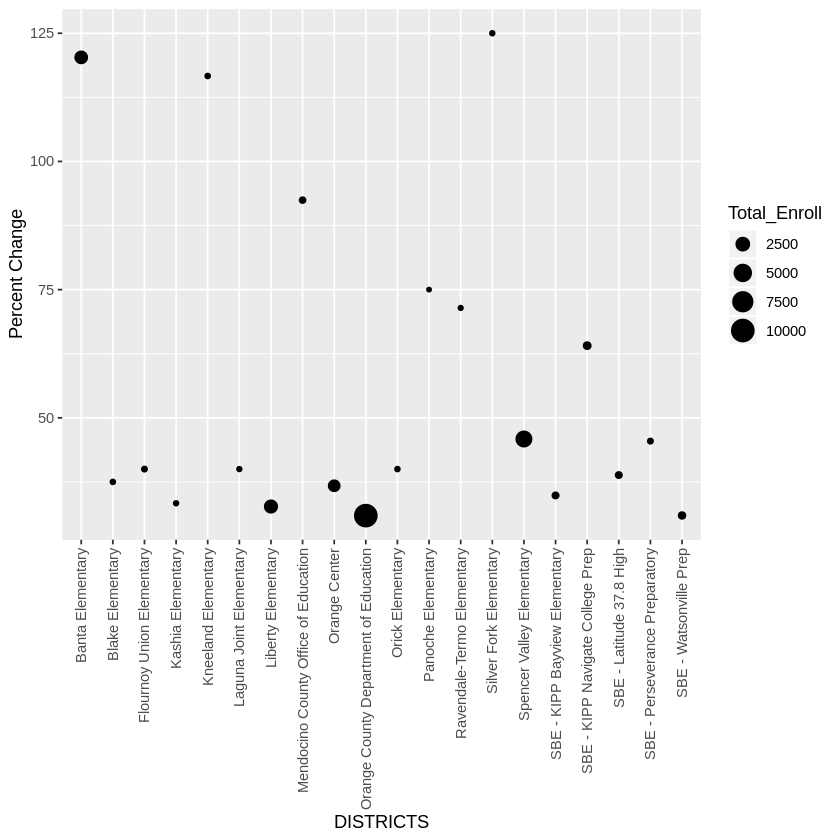

In [4]:
# Plot the top distrcits to show both percent change and total enrollment
ggplot(top_DISTRCITS,
       aes(x=DISTRICT,  
           y=Percent_Change,
#           color=factor(SCHOOL),  
           size=Total_Enroll),
           ) + geom_point() + xlab("DISTRICTS") +
       ylab("Percent Change") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


In [5]:
#create bottom districts dataframe
bottom_DISTRCITS = head(Graph_Explore_2021 %>% arrange(Percent_Change), n=20)

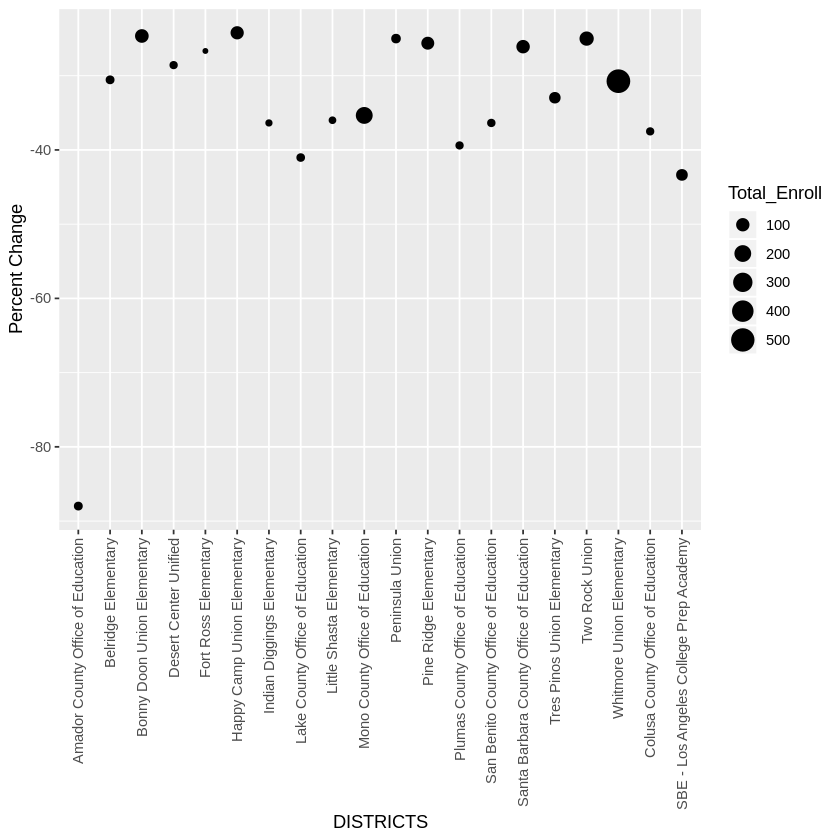

In [6]:
#plot the same for bottom districts

ggplot(bottom_DISTRCITS,
       aes(x=DISTRICT,  
           y=Percent_Change,
#           color=factor(SCHOOL),  
           size=Total_Enroll),
           ) + geom_point() + xlab("DISTRICTS") +
       ylab("Percent Change") + theme(axis.text.x = element_text(angle = 90, vjust = 0.5, hjust=1))


## Enrollment changes per grade 2020-2021 
    this section analyzes enrollment vs. grades, grades/ethnicity, and grades/counties.

In [ ]:
# break down by year

df2 = df %>% subset(Year == 2020 | Year ==2021)
df2$Year = as.factor(df2$Year)
df2$ETHNIC = as.factor(df2$ETHNIC)

In [19]:
#from our data exploration, we determined the highest rate of change for enrollment was between 2020 and 2021
#since the pandemic closers peaked during this time period, loading just these years fram with just these two years data

df2 = df %>% 
    subset(Year == 2020 | Year ==2021) %>%
    select(c(7:15, 17:20,24)) %>% 
    group_by(Year) %>% 
    summarize_all(sum) %>% #sum of enrollment per grade per year
    gather(Grade, Total, KDGN:GR_12) #Gather to convert wide dataset to long

In [20]:
#New dataframe to calculate the difference in enrollment in 2021 for K thru 12
k12_diff = df2 %>%
    group_by(Grade) %>%
    mutate(Difference = Total - lag(Total)) %>% subset(Year == 2021)
k12_diff

Year,Grade,Total,Difference
<fct>,<chr>,<int>,<int>
2021,KDGN,462172,-60837
2021,GR_1,426963,-17157
2021,GR_2,433314,-13925
2021,GR_3,440251,-15022
2021,GR_4,448103,-8258
2021,GR_5,450355,1654
2021,GR_6,441675,-24055
2021,GR_7,460700,-10841
2021,GR_8,468364,-19474


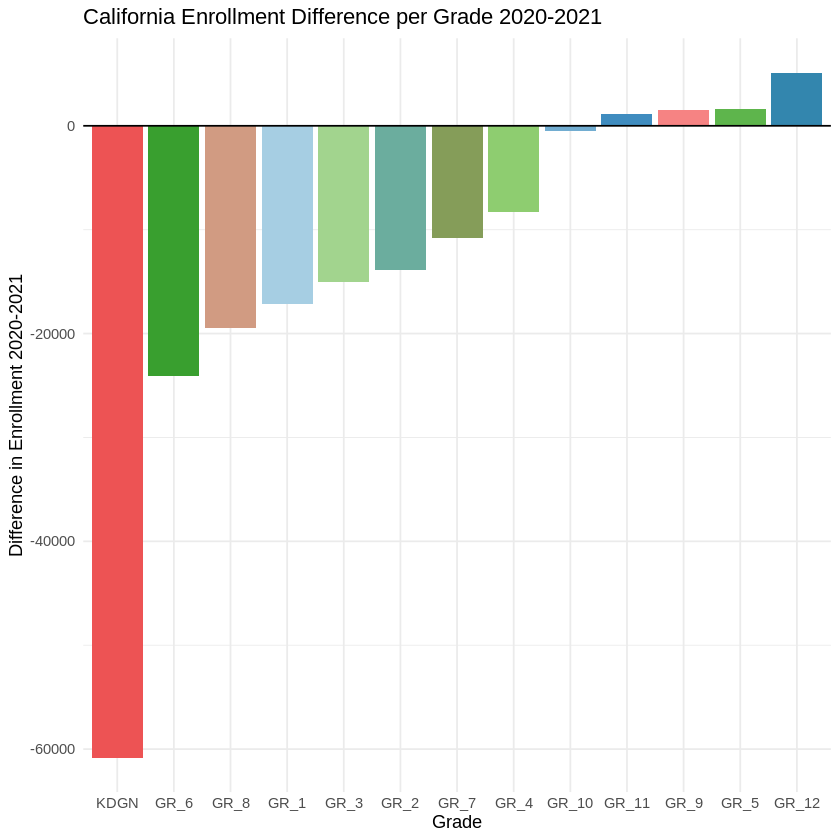

In [21]:
# colorRampPalette() extends any list of colors

# Define the number of colors you want
nb.cols <- 30
mycolors <- colorRampPalette(brewer.pal(12, "Paired"))(nb.cols)

#plot difference in enrollment per grade
p2 = ggplot(data=k12_diff, 
            aes(x= reorder(Grade, Difference),  y=Difference, fill=Grade)) + #reorder sorts x-axis based on value of difference (y)
            geom_bar(stat="identity")

p2 = p2 + ggtitle("California Enrollment Difference per Grade 2020-2021") + #labels
                   ylab("Difference in Enrollment 2020-2021") +
                   xlab("Grade") +  
                   scale_fill_manual(values = mycolors) + #scale_fill_manual to create a plot with 13 colors
                   geom_hline(yintercept = 0)+
                   theme_minimal()

p2 = p2 + 
    theme(
        legend.position = "none",  #remove legend
        axis.text.x = element_text(angle = -30, vjust = 1, hjust = 0) + #adjust x-axis tick label angle
        scale_y_continuous(breaks = scales::pretty_breaks(n = 15)) #add additional y-axis ticks
      
        )
p2

In [22]:
# create a new dataframe filtering to Kindergarten and Grade 12 

K12 = df %>%     
    select(c(7:15, 17:20,24)) %>%
    group_by(Year) %>% 
    summarize_all(sum) %>% #sum of enrollment per grade per year
    gather(Grade, Total, KDGN:GR_12) %>% #Gather to convert wide dataset to long
    filter(Grade == "KDGN" | Grade =="GR_12")
K12

Year,Grade,Total
<fct>,<chr>,<int>
2015,KDGN,511985
2016,KDGN,530531
2017,KDGN,535379
2018,KDGN,531725
2019,KDGN,525758
2020,KDGN,523009
2021,KDGN,462172
2015,GR_12,496901
2016,GR_12,492835


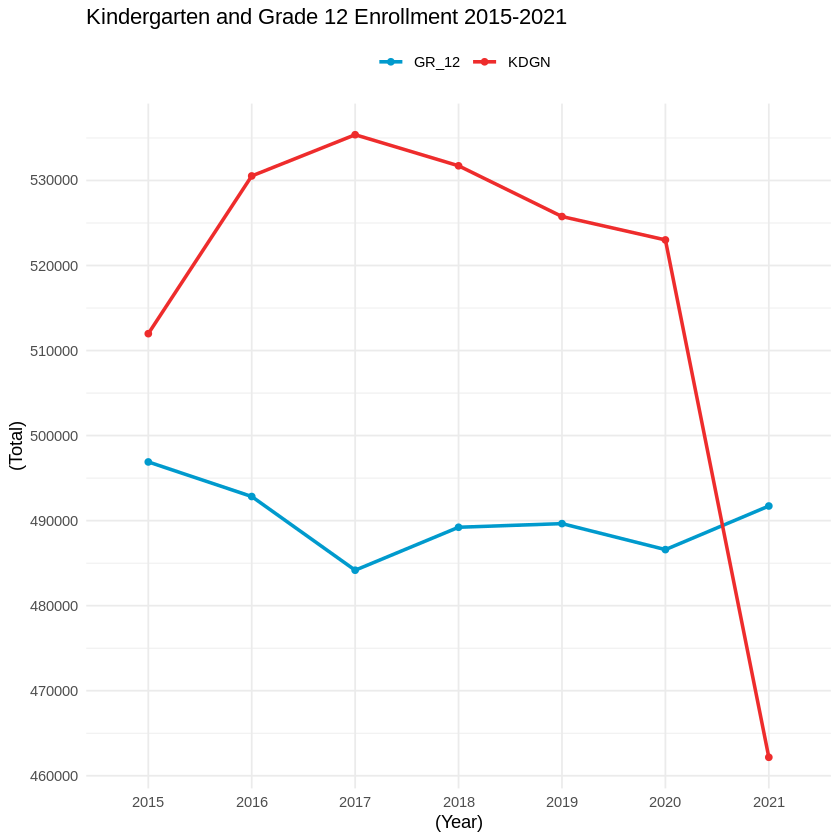

In [23]:
#plot K vs 12
p_K = ggplot(data = K12, aes(x=(Year),y=(Total), group = Grade)) +
        geom_point(aes(color = Grade))+
        geom_line(aes(color = Grade), size=1) +
        scale_color_manual(values = c( "deepskyblue3","firebrick2")) +
        scale_y_continuous(breaks=seq(460000,540000,10000)) + # a tick mark is shown on every 10000
        theme_minimal() +
        ggtitle('Kindergarten and Grade 12 Enrollment 2015-2021') +
        theme(legend.position="top") +
        theme(legend.title=element_blank())
        
p_K

Findings:

Kindergarten had the largest decrease in enrollment with ~60,000 less students in 2021.
Grade 12 had an increase in enrollment with ~5000 more students in 2021.

The following sections explore these two grades vs different factors.

## Kindergarten Enrollment changes vs other factors (Ethnic Group and County) 2020-2021

In [48]:
# create the dataframe
dfKETH = df %>% subset(Year == 2020 | Year ==2021)
dfKETH$Year = as.factor(dfKETH$Year)
dfKETH$ETHNIC = as.factor(dfKETH$ETHNIC)

In [49]:
# Break out the levels and label them

dfKETH$ETHNIC <- ordered(dfKETH$ETHNIC, #label ethnic groups
levels = c(0, 1,2,3,4,5,6,7,9),
labels = c('Not reported','Amer Indian-AK Native','Asian',
               'Pac Islander','Filipino' ,'Hisp-Latino' ,
               'Afr American' ,'White' ,'2+ Races, Not Hisp'))

In [50]:
#selecting KDGN (largest decrease) to look at ethnicity
K_ETHNIC <- dfKETH %>%
    select(ETHNIC, Year, KDGN) %>%
    group_by(ETHNIC, Year)  %>% 
    summarize(Total_K_ETH = sum(KDGN)) %>% #sum totals of the kindergarten ethnic groups by year 
    mutate(Pct_change_K_ETH = #calculate percent change
           format(round((Total_K_ETH/lag(Total_K_ETH)-1)*100), 2), nsmall = 2) %>% #format nsmall helps round negative number (not to zero)
    filter(Year == 2021)

top_decrease_K_ETH = K_ETHNIC %>% arrange(as.numeric(Pct_change_K_ETH))
top_decrease_K_ETH

ETHNIC,Year,Total_K_ETH,Pct_change_K_ETH,nsmall
<ord>,<fct>,<int>,<chr>,<dbl>
Amer Indian-AK Native,2021,1881,-23,2
Afr American,2021,19943,-20,2
White,2021,97918,-17,2
Pac Islander,2021,1702,-14,2
Hisp-Latino,2021,254830,-11,2
"2+ Races, Not Hisp",2021,22724,-9,2
Filipino,2021,9709,-7,2
Not reported,2021,7264,-6,2
Asian,2021,46201,-3,2


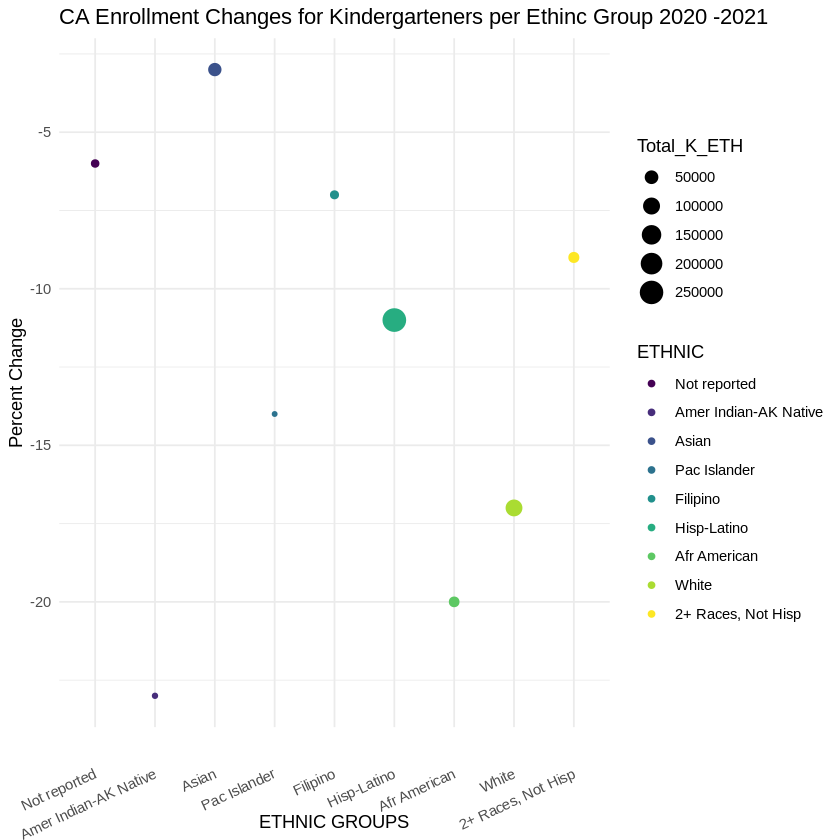

In [66]:
#plot kindergarten ethnic groups decrease in enrollment
ggplot(top_decrease_K_ETH,
       aes(x=ETHNIC,  
        y=as.numeric(Pct_change_K_ETH), #change the character created above when rounding a small number back to numeric
        color=ETHNIC,  
        size=Total_K_ETH),)+ #the size of the points is driven by the total
        geom_point() + 
       labs(x = "ETHNIC GROUPS",
           y = "Percent Change", 
            title = "CA Enrollment Changes for Kindergarteners per Ethinc Group 2020 -2021")+
                 theme_minimal() +
                   theme(axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=1))

In [53]:

#create another dataframe with to look at Ethnicity, Kindergarten (largest decrease in enrollment), 
# and year 

K_ETH = df %>%
    subset(Year == 2020 | Year ==2021) %>%
    select(c(5, 7, 24)) %>% 
    filter( KDGN != 0) %>% #filter out rows with a 0 for KDGN
    group_by(ETHNIC, Year) %>% 
    summarise_at(c("KDGN"), sum)#summarize_at - allows you to select specific columns to perform function on

# calulate percent change per ethnic group
K_ETH_pc = K_ETH %>% group_by(ETHNIC) %>% mutate(Percent_Change = round((KDGN/lag(KDGN)-1)*100))
K_ETH_pc = K_ETH_pc %>% filter(ETHNIC != 0) #remove not-reported

In [54]:
# break out by levels and labels

K_ETH_pc$ETHNIC <- ordered(K_ETH_pc$ETHNIC, #label ethnic groups
levels = c(1,2,3,4,5,6,7,9),
labels = c('Amer Indian-AK Native','Asian',
               'Pac Islander','Filipino' ,'Hisp-Latino' ,
               'Afr American' ,'White' ,'2+ Races, Not Hisp'))

Warning message:
“Removed 8 rows containing missing values (position_stack).”

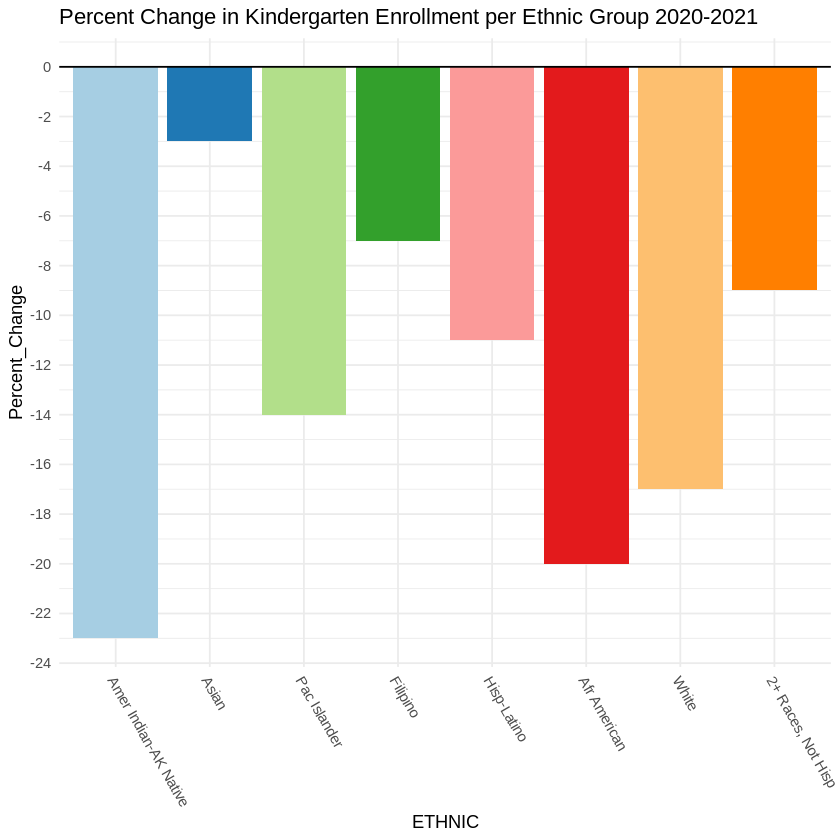

In [55]:
#plot percent change of ethnic groups in kindergarten
p = ggplot(data = K_ETH_pc, aes(x = ETHNIC, y = Percent_Change, fill = ETHNIC)) +
        geom_bar(stat="identity",show.legend = FALSE) +
        theme_minimal() +
        scale_fill_brewer(palette = "Paired")+
        labs(title="Percent Change in Kindergarten Enrollment per Ethnic Group 2020-2021") +
         geom_hline(yintercept = 0) #add horizontal line at 0

p = p + 
    theme(        
        axis.text.x = element_text(angle = -60, vjust = 1, hjust = 0)) + #adjust x-axis tick label angle
        scale_y_continuous(breaks = scales::pretty_breaks(n = 15))  #add additional y-axis ticks 
       
p

Findings:  The largest drop of kindergarten enrollment per ethnic group were American Indian - Alaska Native -23%, African American -20%, and White -17%. However the Hispanic-Latino ethnic group is the largest K population and it dropped -11%.	

In [56]:
#selecting KDGN (largest decrease) to look at county
K_COUNTY = dfKETH %>%
    select(COUNTY, Year, KDGN) %>%
    group_by(COUNTY, Year)  %>% 
    summarize(Total_K_CO = sum(KDGN)) %>% #sum totals of the kindergarten ethnic groups by year 
    mutate(Pct_change_K_CO = #calculate percent change
           format(round((Total_K_CO/lag(Total_K_CO)-1)*100), 2), nsmall = 2) %>% #format nsmall helps round negative number (not to zero)
    filter(Year == 2021)

top_decrease_K_CO = head(K_COUNTY %>% arrange(as.numeric(Pct_change_K_CO)), n=20)
top_decrease_K_CO


COUNTY,Year,Total_K_CO,Pct_change_K_CO,nsmall
<fct>,<fct>,<int>,<chr>,<dbl>
Inyo,2021,188,-31,2
Del Norte,2021,297,-25,2
Calaveras,2021,349,-24,2
El Dorado,2021,2303,-20,2
Plumas,2021,155,-19,2
Tuolumne,2021,414,-19,2
Siskiyou,2021,434,-18,2
Nevada,2021,784,-17,2
Humboldt,2021,1417,-15,2


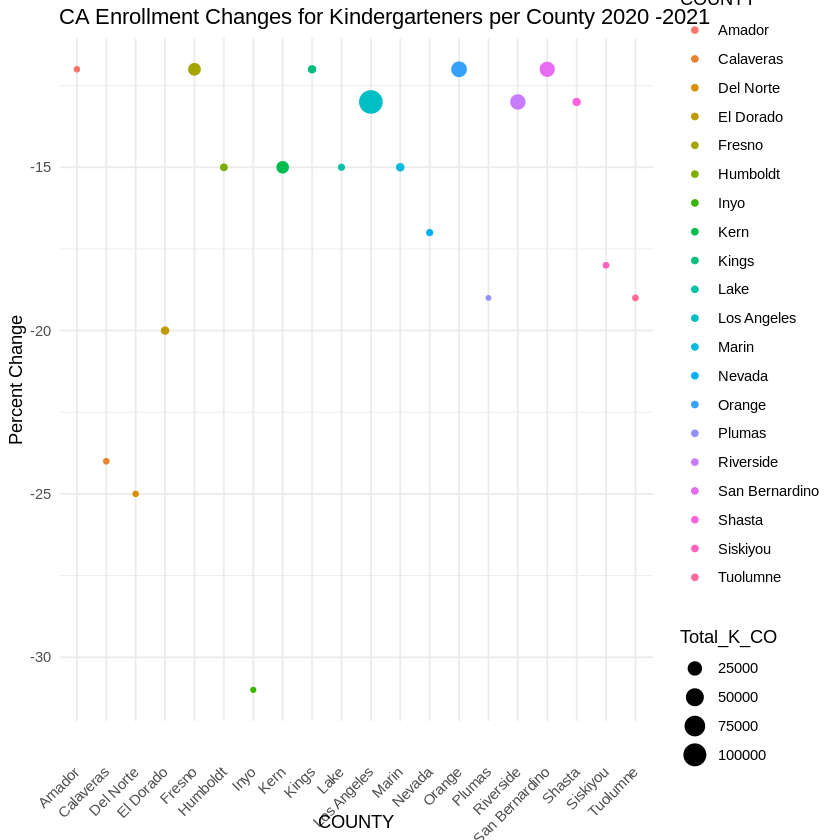

In [57]:
#plot kindergarten decrease in enrollment per county
ggplot(top_decrease_K_CO,
       aes(x=COUNTY,  
        y=as.numeric(Pct_change_K_CO),#change the character created above when rounding a small number back to numeric
        color=COUNTY,  
        size=Total_K_CO),)+ #the size of the points is driven by the total
        geom_point() + 
       labs(y = "Percent Change", 
            title = "CA Enrollment Changes for Kindergarteners per County 2020 -2021 ")+
                 theme_minimal() +
                   theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=1))

Findings:  Los Angeles and Riverside County saw -13% decrease. The largest percent decrease in enrollment for K were smaller populated counties - so these are weighted differently.

## Grade 12 Enrollment changes vs other factors (Ethnic Group and County) 2020-2021

In [58]:
#select grade 12 (largest increase) per ethnic group
GR_12_ETHNIC <- dfKETH %>%
    select(ETHNIC, Year, GR_12) %>%
    group_by(ETHNIC, Year)  %>% 
    summarize(Total_12_ETH = sum(GR_12)) %>%
    mutate(Pct_change_12_ETH = format(round((Total_12_ETH/lag(Total_12_ETH)-1)*100), 2), nsmall = 2) %>% #format nsmall helps round negative number (not to zero)
    filter(Year == 2021)

top_increase_12_ETH = GR_12_ETHNIC %>% arrange(desc(as.numeric(Pct_change_12_ETH)))
head(top_increase_12_ETH)

ETHNIC,Year,Total_12_ETH,Pct_change_12_ETH,nsmall
<ord>,<fct>,<int>,<chr>,<dbl>
"2+ Races, Not Hisp",2021,15890,6,2
Asian,2021,47725,3,2
Hisp-Latino,2021,265819,1,2
White,2021,113439,1,2
Filipino,2021,14639,0,2
Pac Islander,2021,2379,-2,2


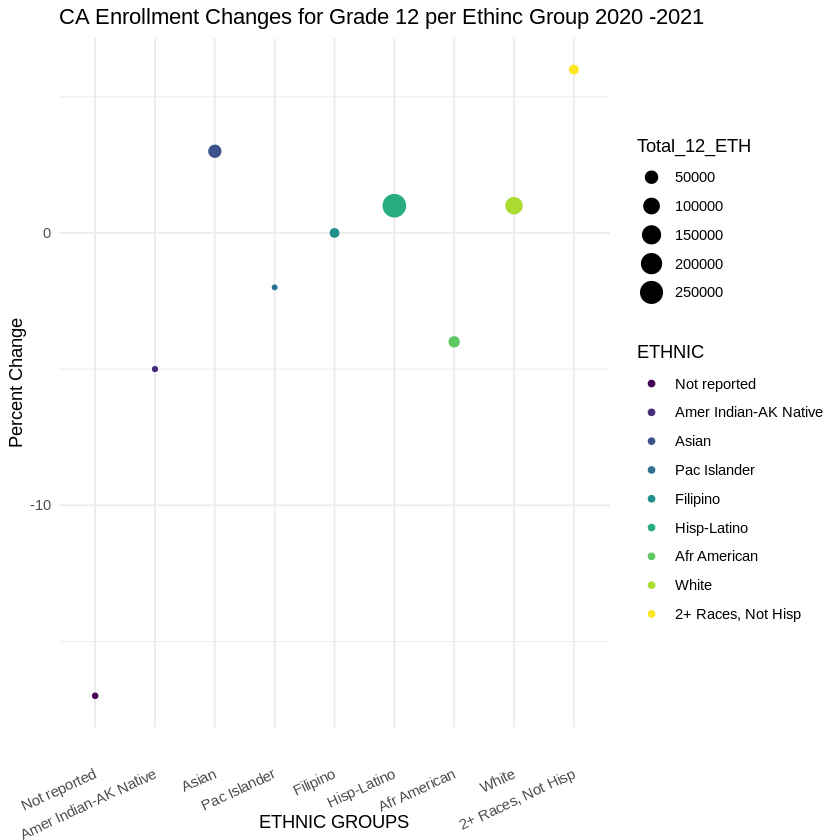

In [67]:
#plot grade 12  per ethnic group
ggplot(top_increase_12_ETH,
       aes(x=ETHNIC,  
        y=as.numeric(Pct_change_12_ETH),#change the character created above when rounding a small number back to numeric
        color=ETHNIC,  
        size=Total_12_ETH),)+ #the size of the points is driven by the total
        geom_point() + 
       labs(x = "ETHNIC GROUPS",
           y = "Percent Change", 
            title = "CA Enrollment Changes for Grade 12 per Ethinc Group 2020 -2021 ")+
                 theme_minimal() +
                   theme(axis.text.x = element_text(angle = 25, vjust = 0.5, hjust=1))

In [60]:
#create a dataframe with to look at Ethnicity, Grade 12 (largest increase in enrollment), and year 
#filter out rows with a 0 for Grade 12, summarize_at - allows you to select specific columns 

GR12_ETH = df %>%
    subset(Year == 2020 | Year ==2021) %>%
    select(c(5, 20, 24)) %>% 
    filter( GR_12 != 0) %>% 
    group_by(ETHNIC, Year) %>% 
    summarise_at(c("GR_12"), sum)

# calulate percent change per ethnic group
GR12_ETH_pc = GR12_ETH %>% group_by(ETHNIC) %>% mutate(Percent_Change = round((GR_12/lag(GR_12)-1)*100))
GR12_ETH_pc = GR12_ETH_pc %>% filter(ETHNIC != 0) #remove not-reported

In [61]:
#break out by levels and add labels
GR12_ETH_pc$ETHNIC <- ordered(GR12_ETH_pc$ETHNIC, #label ethnic groups
levels = c(1,2,3,4,5,6,7,9),
labels = c('Amer Indian-AK Native','Asian',
               'Pac Islander','Filipino' ,'Hisp-Latino' ,
               'Afr American' ,'White' ,'2+ Races, Not Hisp'))

Warning message:
“Removed 8 rows containing missing values (position_stack).”

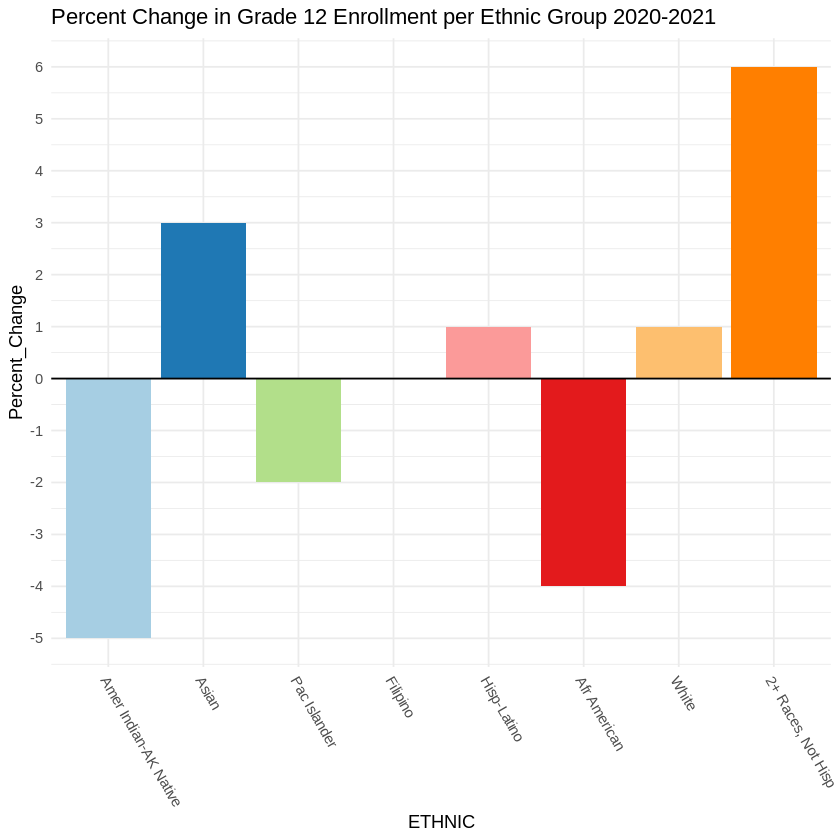

In [62]:
#plot percent change of ethnic groups in Grade 12
p2 = ggplot(data = GR12_ETH_pc, aes(x = ETHNIC, y = Percent_Change, fill = ETHNIC)) +
      geom_bar(stat="identity", show.legend = FALSE) +
               theme_minimal() +
                scale_fill_brewer(palette = "Paired")+
               labs(title="Percent Change in Grade 12 Enrollment per Ethnic Group 2020-2021") +
               geom_hline(yintercept = 0) #add horizontal line at 0
p2 = p2 + 
    theme(       
        axis.text.x = element_text(angle = -60, vjust = 1, hjust = 0)) + #adjust x-axis tick label angle
        scale_y_continuous(breaks = scales::pretty_breaks(n = 15))  #add additional y-axis ticks
     
p2

Findings: The largest drop of Grade 12 enrollment per ethnic group were American Indian - Alaska Native -5%, African American -4%, and White -17%.

The largest increases were seen in the two or more races-not Hispanic +6% and Asian +3% ethnic groups.

In [63]:
#select grade 12 (largest increase) per county
GR_12_COUNTY = dfKETH %>%
    select(COUNTY, Year, GR_12) %>%
    group_by(COUNTY, Year)  %>% 
    summarize(Total_12_CO = sum(GR_12)) %>%
    mutate(Pct_change_12_CO = format(round((Total_12_CO/lag(Total_12_CO)-1)*100), 2), nsmall = 2) %>% #format nsmall helps round negative number (not to zero)
    filter(Year == 2021)

top_increase_12_CO = head(GR_12_COUNTY %>% arrange(desc(as.numeric(Pct_change_12_CO))), n=20)
head(top_increase_12_CO)

COUNTY,Year,Total_12_CO,Pct_change_12_CO,nsmall
<fct>,<fct>,<int>,<chr>,<dbl>
Trinity,2021,145,20,2
Siskiyou,2021,457,9,2
San Benito,2021,919,8,2
Santa Cruz,2021,3435,7,2
Modoc,2021,89,6,2
El Dorado,2021,2374,5,2


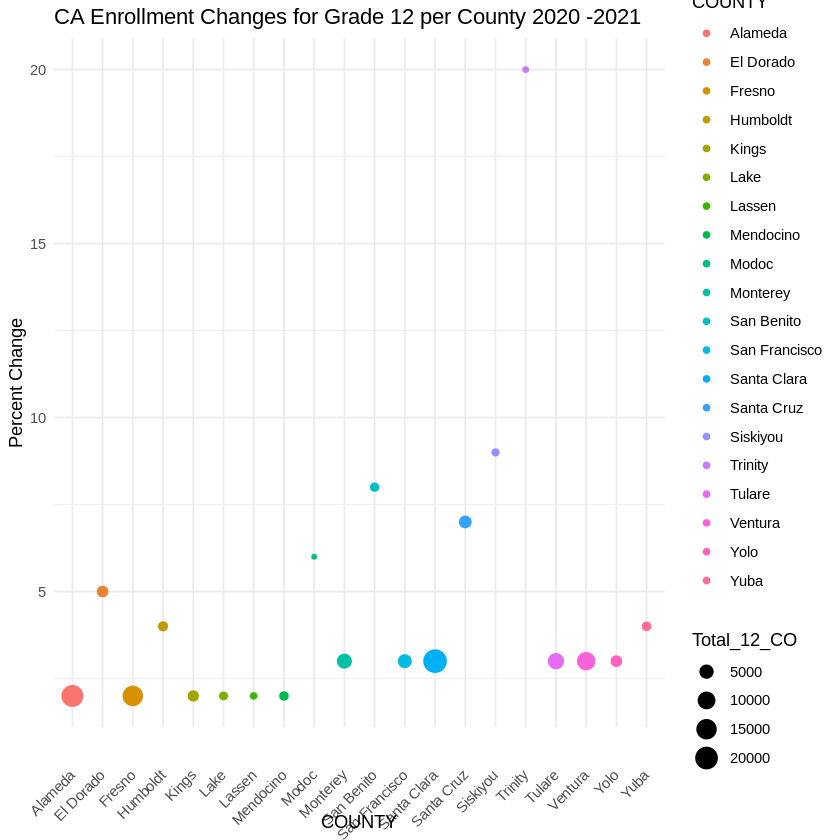

In [64]:
#plot grade 12 per county
ggplot(top_increase_12_CO,
       aes(x=COUNTY,  
        y=as.numeric(Pct_change_12_CO), #change the character created above when rounding a small number back to numeric
        color=COUNTY,  
        size=Total_12_CO),)+ #the size of the points is driven by the total
        geom_point() + 
       labs(y = "Percent Change", 
            title = "CA Enrollment Changes for Grade 12 per County 2020 -2021 ")+
                 theme_minimal() +
                   theme(axis.text.x = element_text(angle = 45, vjust = 0.5, hjust=1))

Findings: The largest percent increase in enrollment for Grade 12 was seen in small to mid-size counties - so these are weighted differently.

## Bottom Three County Correlations, Boxplots, and Linear Regressions

### Inyo County

In [20]:
cnty_inyo_all <- df  %>% 
filter(COUNTY == 'Inyo')

In [21]:
## filter the Inyo County data to just 2021 as that's the year we're more interested in regarding enrollment
cnty_inyo_all_2021 <- cnty_inyo_all  %>% 
filter(Year == 2021)

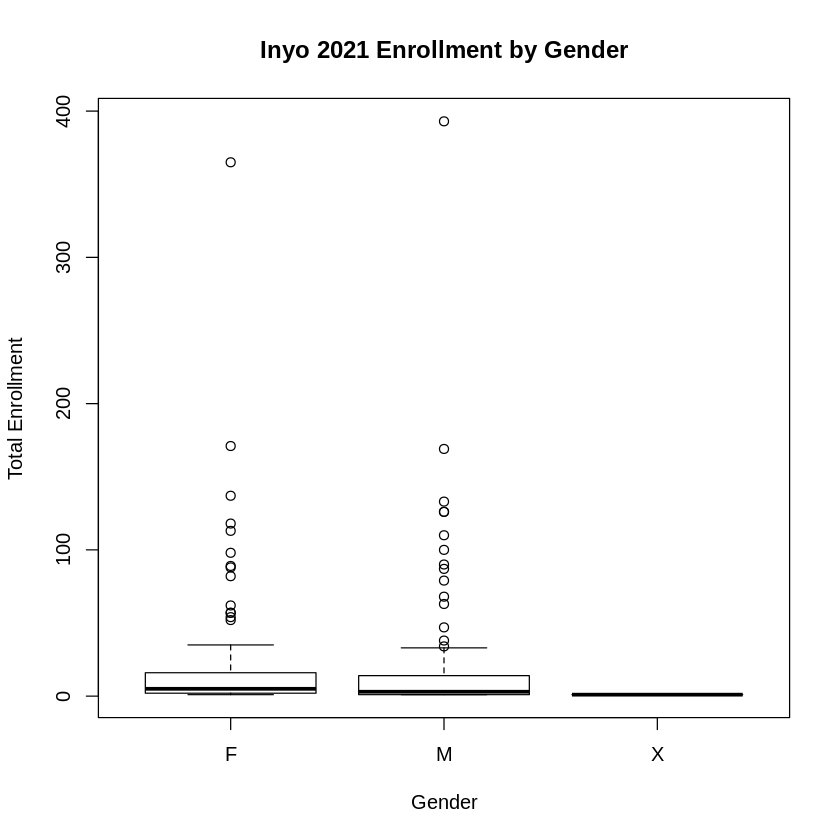

In [22]:
## Create a boxplot to display Inyo County enrollment by gender to visualize any potential differences
boxplot(ENR_TOTAL~GENDER,data=cnty_inyo_all_2021, main="Inyo 2021 Enrollment by Gender",
   xlab="Gender", ylab="Total Enrollment")

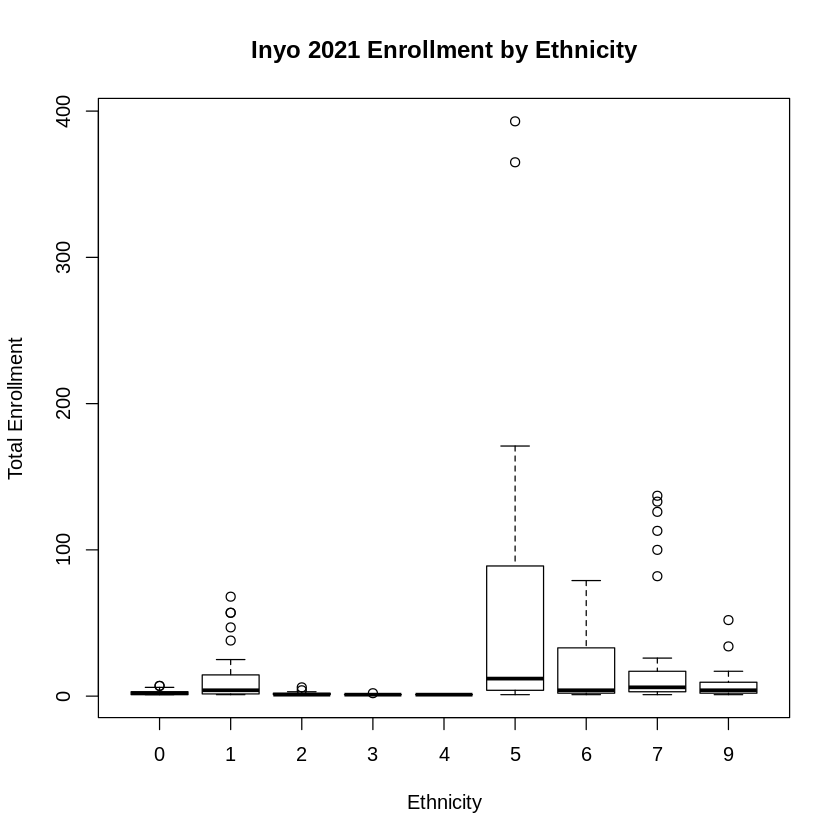

In [23]:
## Create a boxplot to display Inyo County enrollment by ethnicity to visualize any potential differences
boxplot(ENR_TOTAL~ETHNIC,data=cnty_inyo_all_2021, main="Inyo 2021 Enrollment by Ethnicity",
   xlab="Ethnicity", ylab="Total Enrollment")

In [24]:
#Run a bivariate correlation for Inyo County by ethnicity and enrollment total
cor(cnty_inyo_all_2021$ETHNIC, cnty_inyo_all_2021$ENR_TOTAL)

[1] 0.1098025

In [25]:
## Create a linear model for Inyo County in 2021 where gender and ethnicity are hypothesized to predict total enrollment
m_inyo_cnty <- lm(ENR_TOTAL ~ as.factor(GENDER) + as.factor(ETHNIC), data = cnty_inyo_all_2021)
summary(m_inyo_cnty)


Call:
lm(formula = ENR_TOTAL ~ as.factor(GENDER) + as.factor(ETHNIC), 
    data = cnty_inyo_all_2021)

Residuals:
   Min     1Q Median     3Q    Max 
-60.31 -17.84  -4.24   1.24 333.50 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)    
(Intercept)          3.5756    11.8680   0.301   0.7636    
as.factor(GENDER)M  -1.8178     7.3211  -0.248   0.8042    
as.factor(GENDER)X -33.9177    28.3335  -1.197   0.2329    
as.factor(ETHNIC)1  11.6490    14.1394   0.824   0.4112    
as.factor(ETHNIC)2  -0.6083    17.0760  -0.036   0.9716    
as.factor(ETHNIC)3  -1.8030    22.6118  -0.080   0.9365    
as.factor(ETHNIC)4  -2.5756    35.8874  -0.072   0.9429    
as.factor(ETHNIC)5  57.7390    13.7851   4.189 4.51e-05 ***
as.factor(ETHNIC)6  17.0815    17.4538   0.979   0.3291    
as.factor(ETHNIC)7  24.6384    14.0066   1.759   0.0804 .  
as.factor(ETHNIC)9   5.9848    14.9469   0.400   0.6894    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual s

Based on the model Latino/Hispanic ethnicity signficiantly predicts enrollment in 2021. Other ethnic groups and gender do not appear to significantly predict enrollment in Inyo County in 2021. The multiple R-square suggests that the model accounts for about 17% of the variance in total enrollment.

### Mono County

In [26]:
cnty_mono_all <- df  %>% 
filter(COUNTY == 'Mono')

In [27]:
## filter the Mono County data to just 2021 as that's the year we're more interested in regarding enrollment
cnty_mono_all_2021 <- cnty_mono_all  %>% 
filter(Year == 2021)

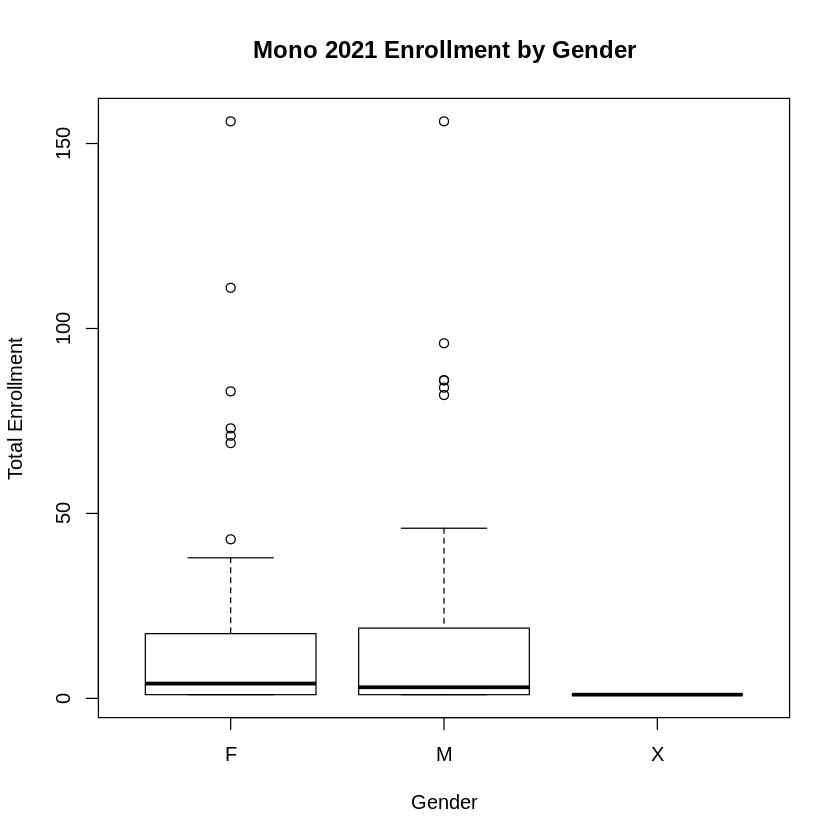

In [28]:
## Create a boxplot to display Mono County enrollment by gender to visualize any potential differences
boxplot(ENR_TOTAL~GENDER,data=cnty_mono_all_2021, main="Mono 2021 Enrollment by Gender",
   xlab="Gender", ylab="Total Enrollment")

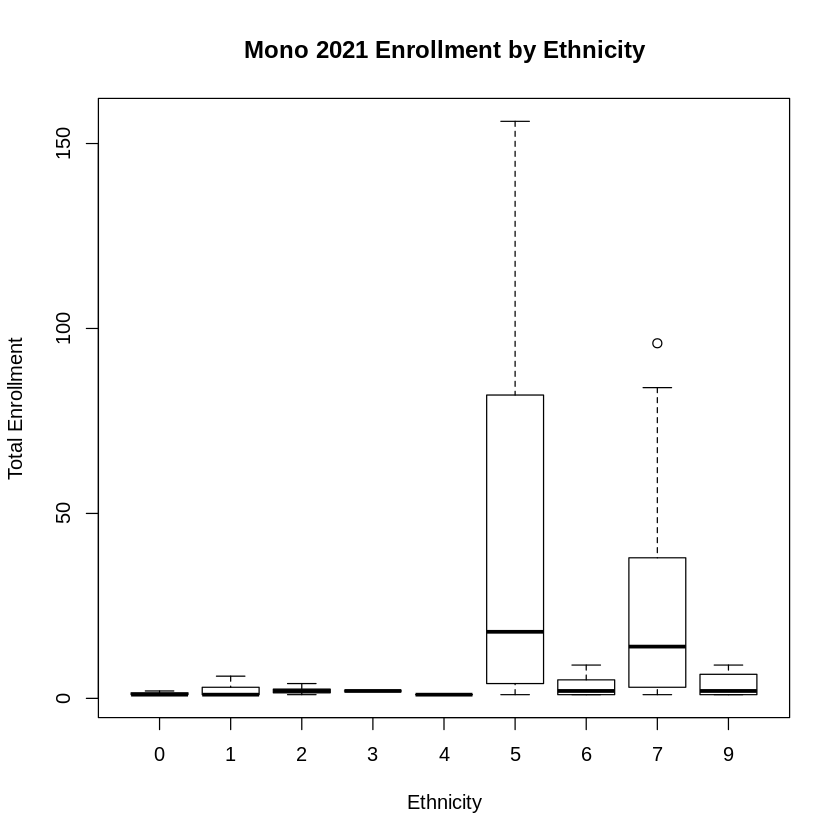

In [29]:
## Create a boxplot to display Mono County enrollment by ethnicity to visualize any potential differences
boxplot(ENR_TOTAL~ETHNIC,data=cnty_mono_all_2021, main="Mono 2021 Enrollment by Ethnicity",
   xlab="Ethnicity", ylab="Total Enrollment")

In [30]:
#Run a bivariate correlation for Mono County by ethnicity and enrollment total
cor(cnty_mono_all_2021$ETHNIC, cnty_mono_all_2021$ENR_TOTAL)

[1] 0.1806913

In [31]:
## Create a linear model for Mono County in 2021 where gender and ethnicity are hypothesized to predict total enrollment
m_mono_cnty <- lm(ENR_TOTAL ~ as.factor(GENDER) + as.factor(ETHNIC), data = cnty_mono_all_2021)
summary(m_mono_cnty)


Call:
lm(formula = ENR_TOTAL ~ as.factor(GENDER) + as.factor(ETHNIC), 
    data = cnty_mono_all_2021)

Residuals:
    Min      1Q  Median      3Q     Max 
-38.886 -17.797  -1.586   1.503 116.203 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)  
(Intercept)          1.7943    15.9269   0.113   0.9106  
as.factor(GENDER)M  -1.0886     6.7073  -0.162   0.8715  
as.factor(GENDER)X -25.3813    31.9887  -0.793   0.4299  
as.factor(ETHNIC)1   0.7914    18.1841   0.044   0.9654  
as.factor(ETHNIC)2   0.8151    19.5236   0.042   0.9668  
as.factor(ETHNIC)3   1.2943    34.9762   0.037   0.9706  
as.factor(ETHNIC)4  -0.2500    22.0190  -0.011   0.9910  
as.factor(ETHNIC)5  39.0918    16.7697   2.331   0.0223 *
as.factor(ETHNIC)6   2.2411    20.8998   0.107   0.9149  
as.factor(ETHNIC)7  24.5870    16.8196   1.462   0.1478  
as.factor(ETHNIC)9   2.6849    19.5236   0.138   0.8910  
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error:

Based on the model Latino/Hispanic ethnicity signficiantly predicts enrollment in 2021. Other ethnic groups and gender do not appear to significantly predict enrollment in Mono County in 2021. The multiple R-square suggests that the model accounts for about 24% of the variance in total enrollment.

### Sierra County

In [32]:
cnty_sierra_all <- df  %>% 
filter(COUNTY == 'Sierra')

In [33]:
## filter the Sierra County data to just 2021 as that's the year we're more interested in regarding enrollment
cnty_sierra_all_2021 <- cnty_sierra_all  %>% 
filter(Year == 2021)

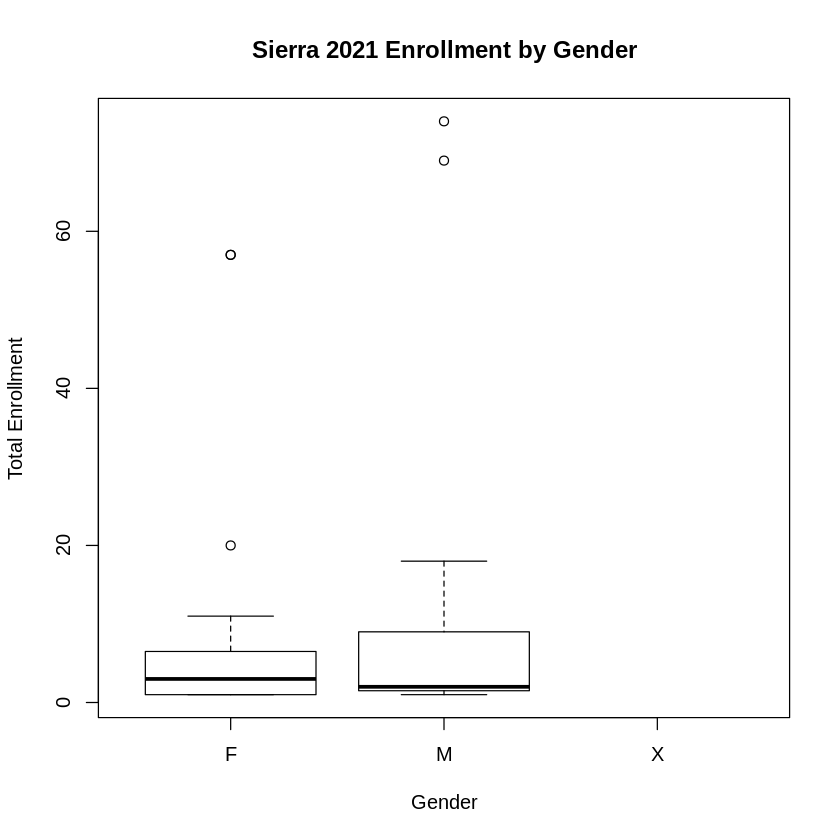

In [34]:
## Create a boxplot to display Sierra County enrollment by gender to visualize any potential differences
boxplot(ENR_TOTAL~GENDER,data=cnty_sierra_all_2021, main="Sierra 2021 Enrollment by Gender",
   xlab="Gender", ylab="Total Enrollment")

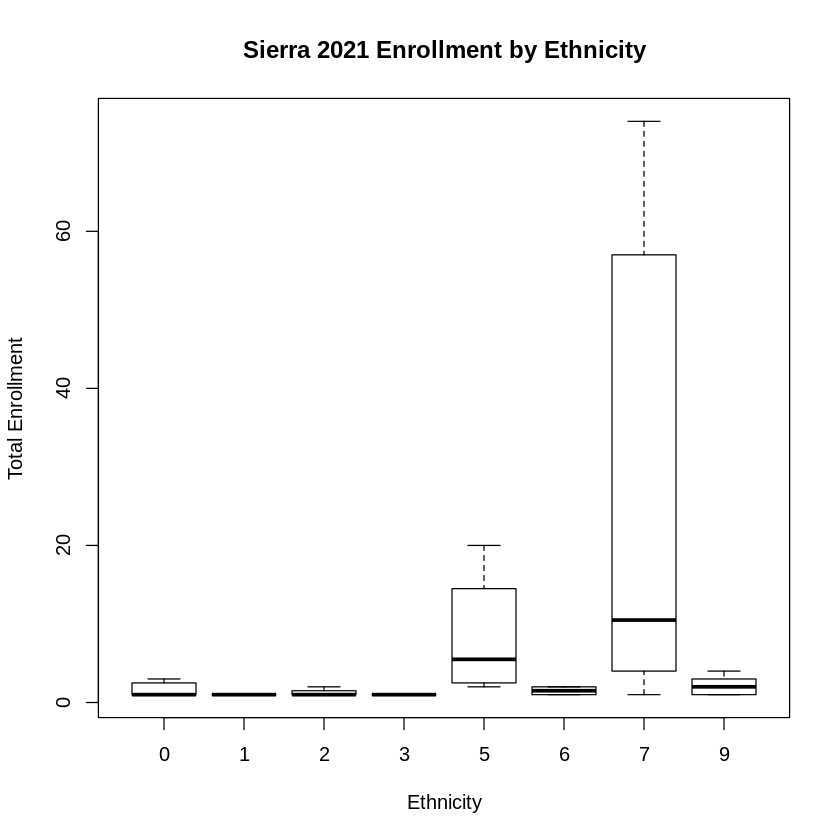

In [35]:
## Create a boxplot to display Sierra County enrollment by ethnicity to visualize any potential differences
boxplot(ENR_TOTAL~ETHNIC,data=cnty_sierra_all_2021, main="Sierra 2021 Enrollment by Ethnicity",
   xlab="Ethnicity", ylab="Total Enrollment")

In [36]:
#Run a bivariate correlation for Sierra County by ethnicity and enrollment total
cor(cnty_sierra_all_2021$ETHNIC, cnty_sierra_all_2021$ENR_TOTAL)

[1] 0.2707071

In [37]:
## Create a linear model for Sierra County in 2021 where gender and ethnicity are hypothesized to predict total enrollment
m_sierra_cnty <- lm(ENR_TOTAL ~ as.factor(GENDER) + as.factor(ETHNIC), data = cnty_sierra_all_2021)
summary(m_sierra_cnty)


Call:
lm(formula = ENR_TOTAL ~ as.factor(GENDER) + as.factor(ETHNIC), 
    data = cnty_sierra_all_2021)

Residuals:
    Min      1Q  Median      3Q     Max 
-28.396  -3.748   0.070   1.162  43.604 

Coefficients:
                   Estimate Std. Error t value Pr(>|t|)   
(Intercept)         0.86087    7.06898   0.122  0.90391   
as.factor(GENDER)M  1.99130    6.06798   0.328  0.74514   
as.factor(ETHNIC)1  0.13913   18.77294   0.007  0.99414   
as.factor(ETHNIC)2 -0.19130   12.01495  -0.016  0.98741   
as.factor(ETHNIC)3  0.13913   18.77294   0.007  0.99414   
as.factor(ETHNIC)5  6.51848    9.01122   0.723  0.47524   
as.factor(ETHNIC)6 -1.35217   14.36861  -0.094  0.92567   
as.factor(ETHNIC)7 27.54348    8.58142   3.210  0.00324 **
as.factor(ETHNIC)9 -0.02174    9.78283  -0.002  0.99824   
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 17.39 on 29 degrees of freedom
Multiple R-squared:  0.3718,	Adjusted R-squared:  0.1985 
F-statistic: 2

Based on the model White, Not Hispanic ethnicity signficiantly predicts enrollment in 2021. Other ethnic groups and gender do not appear to significantly predict enrollment in Sierra County in 2021. The multiple R-square suggests that the model accounts for about 37% of the variance in total enrollment.

In [38]:
#Save our dataframe to an Rda file
saveRDS(df,file="Group7DataFrame.Rda")